# SCRAPING COINMARKETCAP

- This script scraps TOP20 Crypto date from coinmarketcap
- The first date selection is to grab the historical TOP20 cryptos at that time 
- The second date selection is to grab the price changes from start date to end date

In [1]:
# Libraries Used

import requests
from bs4 import BeautifulSoup
import pandas as pd
from cryptocmd import CmcScraper
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
def get_topic_page(topic,yyyymmdd):
    
    topic_url = topic+'/historical/'+str(yyyymmdd)
    response = requests.get(topic_url)
    
    with open('cryptooo.html','w') as f:
        f.write(response.text)
    
    if not response.ok:
        print('status:', response.status_code)
        raise Exception('Failed to fetch webpage')
    
    
    return BeautifulSoup(response.text)

In [3]:
def split_it(td_tags,symbol):
    if len(symbol) == 3:
        return td_tags[1].text[3:]
    else:
        return td_tags[1].text[4:]

In [4]:
def get_crypto_data(tr_tag):
    
    td_tags = tr_tag.find_all('td')  
    symbol =td_tags[2].text
    name = split_it(td_tags,symbol)       
    rank = td_tags[0].text
    price = td_tags[4].text
    market_cap = td_tags[6].text
    return {'Name:': name,
            'Symbol:':symbol,
            'Rank:': rank,
            'Price:': price,
            'Marketcap:': market_cap}

In [5]:
## get dataframe of all 20 crypto 

def flow_it():
    tr_tags = doc.tbody.find_all('tr')
    
    # Retrives top 20 crypto from any historical data given the date
    top_20_crypto = [get_crypto_data(tr_tags[i]) for i in range(20)]
    new_20 = pd.DataFrame(top_20_crypto)
    return new_20

In [6]:
# instance for cmcscraper to get the data 
#start = dd-mm-yyyy
#end = dd-mm-yyyy
def createit(new_20,start,end):
    
    new_list = []
    for i in range(18):
       
        new_list.append(CmcScraper((new_20.loc[i,'Symbol:']),start,end).get_dataframe().drop(['Market Cap','Volume','Low','High'],axis = 1))
        
    return new_list  

# Sample Use 
if __name__ == "__main__":
    
    topic='https://coinmarketcap.com'   ## URL to request to scrape
    doc = get_topic_page(topic,20200101)  ## takes in two argument, URL and the historical date to scrap
    data = flow_it()
    Symbol = list(data['Symbol:'])  #get a list of the top 20 coins symbols
    all_20_dataframe =createit(data,'01-01-2020','03-01-2022')
    Crypto_final_list = pd.concat(all_20_dataframe,keys = Symbol,axis = 1)
    Crypto_final_list.columns.names = ['Crypto','Crypto_info']
    Crypto_final_list

In [7]:
topic='https://coinmarketcap.com'   ## URL to request to scrape
doc = get_topic_page(topic,20200101)  ## takes in two argument, URL and the historical date to scrap
data = flow_it()
Symbol = list(data['Symbol:'])  #get a list of the top 20 coins symbols
all_20_dataframe =createit(data,'01-01-2012','03-01-2022')
Crypto_final_list = pd.concat(all_20_dataframe,keys = Symbol,axis = 1)
Crypto_final_list.columns.names = ['Crypto','Crypto_info']
Crypto_final_list

Crypto             BTC                                    ETH               \
Crypto_info       Date          Open         Close       Date         Open   
0           2022-01-03  47343.543765  46458.116959 2022-01-03  3829.535741   
1           2022-01-02  47680.926625  47345.220564 2022-01-02  3769.298437   
2           2022-01-01  46311.744663  47686.811509 2022-01-01  3683.047156   
3           2021-12-31  47169.372859  46306.446123 2021-12-31  3713.430093   
4           2021-12-30  46490.606049  47178.125843 2021-12-30  3632.219817   
...                ...           ...           ...        ...          ...   
3168        2013-05-02    116.379997    105.209999        NaT          NaN   
3169        2013-05-01    139.000000    116.989998        NaT          NaN   
3170        2013-04-30    144.000000    139.000000        NaT          NaN   
3171        2013-04-29    134.444000    144.539993        NaT          NaN   
3172        2013-04-28    135.300003    134.210007        NaT          NaN   

Crypto                          XRP                           USDT  ...  \
Crypto_info        Close       Date      Open     Close       Date  ...   
0            3761.380274 2022-01-03  0.859107  0.832885 2022-01-03  ...   
1            3829.565045 2022-01-02  0.849442  0.859118 2022-01-02  ...   
2            3769.696916 2022-01-01  0.831281  0.849472 2022-01-01  ...   
3            3682.632905 2021-12-31  0.839681  0.831163 2021-12-31  ...   
4            3713.852163 2021-12-30  0.817919  0.839649 2021-12-30  ...   
...                  ...        ...       ...       ...        ...  ...   
3168                 NaN        NaT       NaN       NaN        NaT  ...   
3169                 NaN        NaT       NaN       NaN        NaT  ...   
3170                 NaN        NaT       NaN       NaN        NaT  ...   
3171                 NaN        NaT       NaN       NaN        NaT  ...   
3172                 NaN        NaT       NaN       NaN        NaT  ...   

Crypto            LEO        XMR                                 HT            \
Crypto_info     Close       Date        Open       Close       Date      Open   
0            3.795962 2022-01-03  239.374921  231.547550 2022-01-03  9.402447   
1            3.779418 2022-01-02  250.174352  239.371703 2022-01-02  9.439328   
2            3.803560 2022-01-01  228.847844  250.206176 2022-01-01  9.374273   
3            3.768074 2021-12-31  225.582449  228.824957 2021-12-31  9.488653   
4            3.790645 2021-12-30  214.649997  225.748020 2021-12-30  9.679224   
...               ...        ...         ...         ...        ...       ...   
3168              NaN        NaT         NaN         NaN        NaT       NaN   
3169              NaN        NaT         NaN         NaN        NaT       NaN   
3170              NaN        NaT         NaN         NaN        NaT       NaN   
3171              NaN        NaT         NaN         NaN        NaT       NaN   
3172              NaN        NaT         NaN         NaN        NaT       NaN   

Crypto                      LINK                        
Crypto_info     Close       Date       Open      Close  
0            9.378160 2022-01-03  21.832073  23.573905  
1            9.402636 2022-01-02  20.666177  21.831890  
2            9.441516 2022-01-01  19.593613  20.665088  
3            9.371063 2021-12-31  19.962461  19.592325  
4            9.487837 2021-12-30  19.748914  19.970342  
...               ...        ...        ...        ...  
3168              NaN        NaT        NaN        NaN  
3169              NaN        NaT        NaN        NaN  
3170              NaN        NaT        NaN        NaN  
3171              NaN        NaT        NaN        NaN  
3172              NaN        NaT        NaN        NaN  

[3173 rows x 54 columns]

In [8]:
df = Crypto_final_list.copy()

In [9]:
df_btc = df["BTC"]
df_btc["Date"] = pd.to_datetime(df_btc["Date"])
df_btc = df_btc.set_index("Date")
df_btc.head(2)

/Users/apurba60/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Crypto_info,Open,Close
Date,,
2022-01-03,47343.543765,46458.116959
2022-01-02,47680.926625,47345.220564


In [10]:
df_btc["Log_return"] = (df_btc["Close"].shift(1)/df_btc["Close"]).apply(lambda x: math.log(x))
df_btc = df_btc.dropna()
df_btc = df_btc.drop(["Open"], axis = 1)

<AxesSubplot:xlabel='Date'>

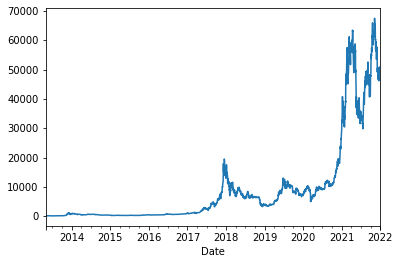

In [11]:
df_btc["Close"].plot()

In [12]:
df_btc.head(2)

Crypto_info,Close,Log_return
Date,,
2022-01-02,47345.220564,-0.018915
2022-01-01,47686.811509,-0.007189


In [26]:
df_btc.isnull().sum()

Crypto_info
Close         0
Log_return    0
dtype: int64

In [99]:
# Split between train and test

df1 = df_btc.copy()
df1 = df1.reset_index()
df1 = df1[["Date","Close"]]
df1.columns = ["ds", "y"]
df1 = df1.set_index("ds")
train = df1.loc["2013-04-28":"2022-01-01"]
test = df1.loc["2021-01-01":]

/Users/apurba60/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  if __name__ == '__main__':


In [100]:
# Import library and instantiate the model
from prophet import Prophet
fbprop = Prophet(daily_seasonality=True)
fbprop_fit = fbprop.fit(train.reset_index())

Initial log joint probability = -118.683
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6698.91    0.00962458       1891.52      0.3196      0.3196      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6865.47    0.00452672         338.7       1.011      0.1011      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6906.29    0.00152905       464.341      0.2592           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6945.1     0.0219353       323.196           1           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6975.73    0.00610299       460.149           1           1      608   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [101]:
# Predict, input should be a pd.dataframe with date column as ds
X = test.copy()
X.reset_index(inplace = True)
pred = fbprop.predict(pd.DataFrame(X["ds"],columns = ["ds"]))
pred = pred["yhat"]

In [102]:
# Check Error
rmse_test_prophet = math.sqrt(mean_squared_error(test["y"],pred))
print('Test Score: %.2f RMSE' % (rmse_test_prophet))

Test Score: 14385.39 RMSE


<AxesSubplot:xlabel='Date', ylabel='Close'>

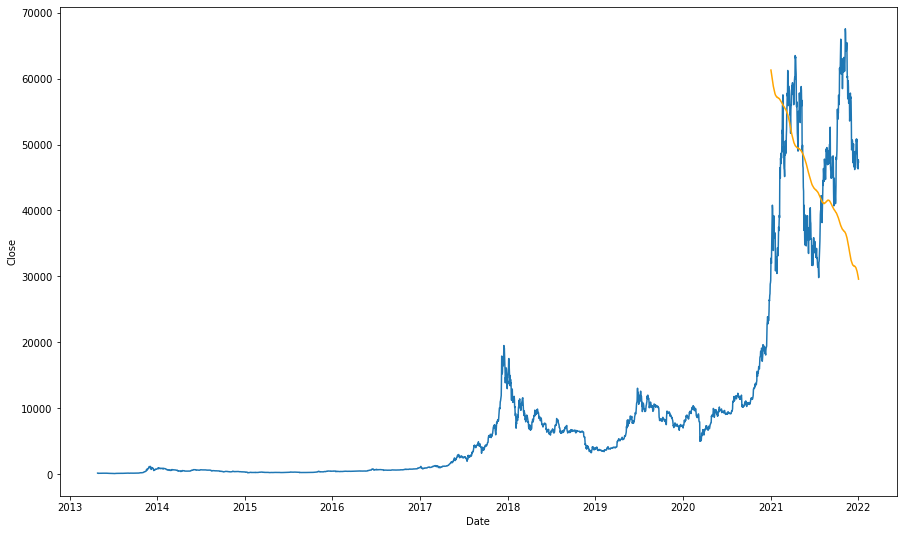

In [103]:
# Plot 
test = test.reset_index()
f, ax = plt.subplots(figsize = (15,9))

sns.lineplot(x = df_btc.index, y = df_btc["Close"], ax = ax)
sns.lineplot(x = test["ds"], y = pred, ax = ax, color = "orange")

# Conclusion: 

-The model was not able to perform well due to the exponential growth
- Its better to try with log returns to see better result
